In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from dolo import *

In [3]:
filename =  'https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/rbc_taxes.yaml'

In [4]:
model = yaml_import(filename)

Model type detected as 'dtcscc'


The model defined in `rbc_taxes.yaml` is the `rbc` model, with an agregate tax `g` that is proportional to income. 

In [5]:
model.calibration

OrderedDict([('states', array([ 1.        ,  9.35497829,  0.        ])),
             ('controls', array([ 0.23387446,  0.33      ])),
             ('auxiliaries',
              array([ 0.03510101,  2.02026956,  0.99505814,  0.76118369])),
             ('shocks', array([ 0.])),
             ('parameters',
              array([ 0.99      ,  1.        ,  1.        ,  8.04277482,  0.025     ,
                      0.33      ,  0.8       ,  1.        ]))])

In [6]:
model.residuals()

OrderedDict([('transition', array([ 0.,  0.,  0.])),
             ('arbitrage', array([  0.00000000e+00,  -8.88178420e-16])),
             ('auxiliary',
              array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
                      -1.11022302e-16]))])

We want to compute the adjustment of the economy when this tax, goes back progressively from 10% to 0%, over 10 periods.

In [7]:
exo_g = linspace(0.1,0,10) # this is a vector of size 10
exo_g = atleast_2d(exo_g).T # the solver expects a 1x10 vector
print(exo_g.shape)

(10, 1)


In [8]:
exo_g

array([[ 0.1       ],
       [ 0.08888889],
       [ 0.07777778],
       [ 0.06666667],
       [ 0.05555556],
       [ 0.04444444],
       [ 0.03333333],
       [ 0.02222222],
       [ 0.01111111],
       [ 0.        ]])

In [9]:
# Let's solve for the optimal adjustment by assuming that the
# economy returns to steady-state after T=50 periods.
from dolo.algos.dtcscc.perfect_foresight import deterministic_solve
sim = deterministic_solve(model, shocks=exo_g, T=50)
display(sim) # it returns a timeseries object

,z,k,g,i,n,rk,w,y,c,e_g
0,1,9.989641,1.000000e-01,0.150903,0.332302,0.033748,2.059777,1.021595,0.770692,0.088889
1,1,9.890803,8.888889e-02,0.158465,0.331771,0.033937,2.054114,1.017158,0.769804,0.077778
2,1,9.801998,7.777778e-02,0.166292,0.331274,0.034108,2.049022,1.013117,0.769047,0.066667
3,1,9.723240,6.666667e-02,0.174417,0.330819,0.034261,2.044503,1.009492,0.768408,0.055556
4,1,9.654576,5.555556e-02,0.182875,0.330411,0.034396,2.040558,1.006302,0.767872,0.044444
5,1,9.596086,4.444444e-02,0.191699,0.330058,0.034512,2.037188,1.003567,0.767424,0.033333
6,1,9.547883,3.333333e-02,0.200926,0.329767,0.034608,2.034398,1.001308,0.767049,0.022222
7,1,9.510112,2.222222e-02,0.210594,0.329545,0.034684,2.032190,0.999549,0.766733,0.011111
8,1,9.482953,1.111111e-02,0.220740,0.329399,0.034740,2.030569,0.998311,0.766459,0.000000
9,1,9.466619,-1.010101e-21,0.231406,0.329338,0.034776,2.029538,0.997618,0.766213,0.000000


In [10]:
model


Model object:
------------

- name: "taxes"
- type: "dtcscc"
- file: "https://raw.githubusercontent.com/EconForge/dolo/master/examples/models/rbc_taxes.yaml

- residuals:

    transition
        1   : 0.0000 : z = (1-rho)*zbar + rho*z(-1)
        2   : 0.0000 : k = (1-delta)*k(-1) + i(-1)
        3   : 0.0000 : g = e_g

    arbitrage
        1   : 0.0000 : 1 - beta*(c/c(1))**(sigma)*(1-delta+rk(1))    | 0 <= i <= inf
        2   : 0.0000 : chi*n**eta*c**sigma - w                        | 0 <= n <= inf

    auxiliary
        1   : 0.0000 : rk = alpha*z*(n/k)**(1-alpha)
        2   : 0.0000 : w = (1-alpha)*z*(k/n)**(alpha)
        3   : 0.0000 : y = z*k**alpha*n**(1-alpha)
        4   : 0.0000 : c = k*rk + w*n - i - g


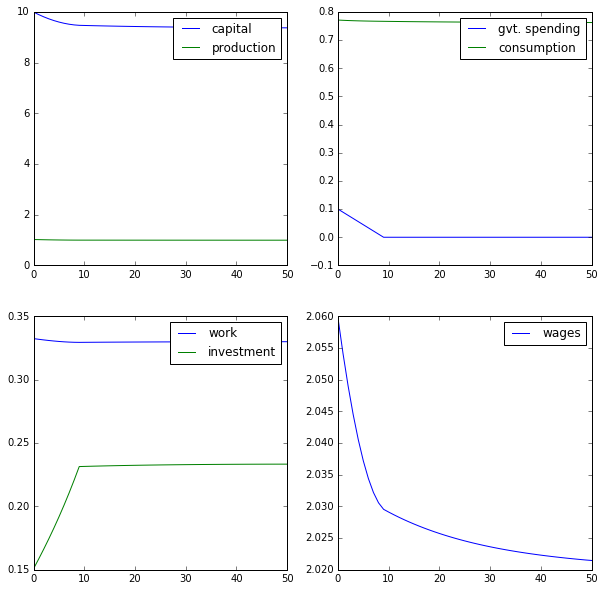

In [11]:
figsize(10,10)
subplot(221)
plot(sim['k'], label='capital')
plot(sim['y'], label='production')
legend()
subplot(222)
plot(sim['g'], label='gvt. spending')
plot(sim['c'], label='consumption')
legend()
subplot(223)
plot(sim['n'], label='work')
plot(sim['i'], label='investment')
legend()
subplot(224)
plot(sim['w'], label='wages')
legend()